In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, precision_score, recall_score

from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

%matplotlib inline

In [60]:
df_train = pd.read_csv('train_titanic.csv')

df_test = pd.read_csv('test_titanic.csv') 

df_y_test = pd.read_csv('gender_submission.csv')

In [61]:
df_test['Survived'] = df_y_test['Survived']

In [62]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [63]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [64]:
pd.DataFrame([df_train.corr()['Survived'].sort_values()])

,Pclass,Age,SibSp,PassengerId,Parch,Fare,Survived
Survived,-0.338481,-0.077221,-0.035322,-0.005007,0.081629,0.257307,1.0


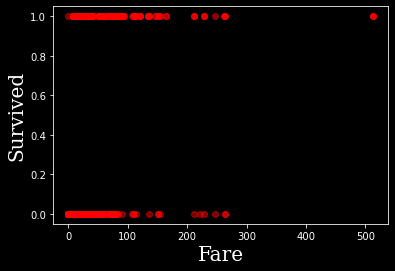

In [65]:
font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 20,
        }

plt.style.use('dark_background')

fig, ax = plt.subplots()

X=df_train['Fare']
y=df_train['Survived']


ax.set_xlabel('Fare', fontdict=font)
ax.set_ylabel('Survived', fontdict=font)

  
plt.plot(X,y, 'ro', alpha=0.5)



In [66]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [67]:
100*(df_train.isnull().sum()/len(df_train))

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [68]:
def missing_percent(df):
    nan_percent= 100*(df.isnull().sum()/len(df))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [69]:
nan_percent= missing_percent(df_train)

In [70]:
nan_percent

Embarked     0.224467
Age         19.865320
Cabin       77.104377
dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, 'Embarked'), Text(1, 0, 'Age'), Text(2, 0, 'Cabin')])

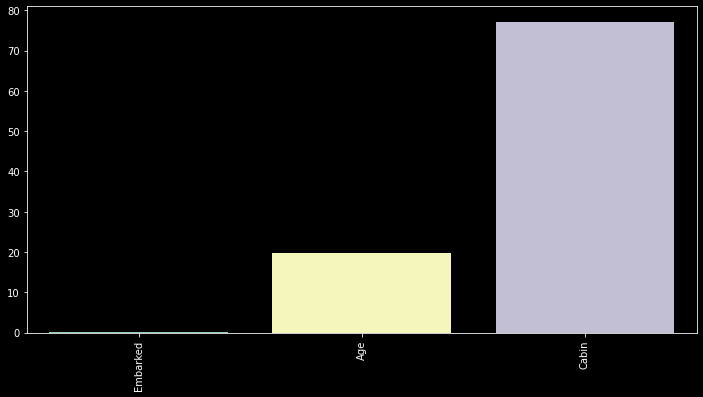

In [71]:
nan_percent= missing_percent(df_train)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [72]:
nan_percent[nan_percent<1].index

Index(['Embarked'], dtype='object')

In [73]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [74]:
df_train= df_train.dropna(axis=0, subset=['Embarked'])

(array([0, 1]), [Text(0, 0, 'Age'), Text(1, 0, 'Cabin')])

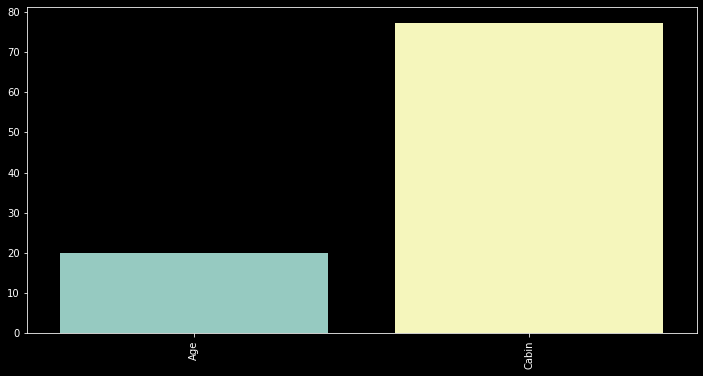

In [75]:
nan_percent= missing_percent(df_train)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [76]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

(array([0]), [Text(0, 0, 'Cabin')])

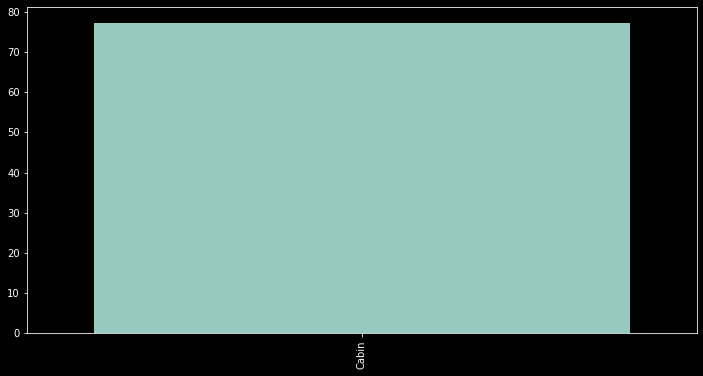

In [77]:
nan_percent= missing_percent(df_train)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [78]:
df_train=df_train.drop(['Cabin'], axis=1)

In [79]:
nan_percent= missing_percent(df_train)
nan_percent

Series([], dtype: float64)

In [80]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [81]:
pd.DataFrame([df_test.corr()['Survived'].sort_values()])

,Pclass,PassengerId,Age,SibSp,Parch,Fare,Survived
Survived,-0.108615,-0.023245,-0.000013,0.099943,0.15912,0.191514,1.0


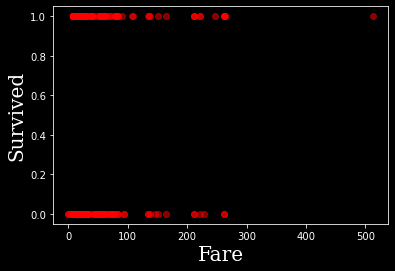

In [82]:
font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 20,
        }

plt.style.use('dark_background')

fig, ax = plt.subplots()

X=df_test['Fare']
y=df_test['Survived']


ax.set_xlabel('Fare', fontdict=font)
ax.set_ylabel('Survived', fontdict=font)

  
plt.plot(X,y, 'ro', alpha=0.5)

In [83]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [84]:
100*(df_test.isnull().sum()/len(df_test))

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
Survived        0.000000
dtype: float64

In [85]:
nan_percent= missing_percent(df_test)
nan_percent

Fare      0.239234
Age      20.574163
Cabin    78.229665
dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, 'Fare'), Text(1, 0, 'Age'), Text(2, 0, 'Cabin')])

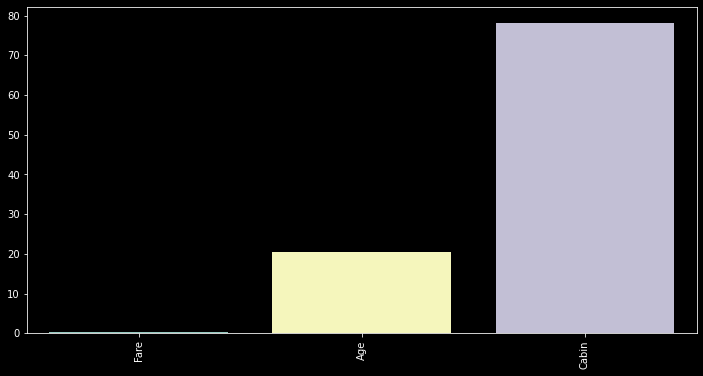

In [86]:
plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [87]:
nan_percent[nan_percent<1].index

Index(['Fare'], dtype='object')

In [88]:
df_test[df_test['Fare'].isnull()]

df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())
df_test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [89]:
df_test= df_test.dropna(axis=0, subset=['Fare'])

(array([0, 1]), [Text(0, 0, 'Age'), Text(1, 0, 'Cabin')])

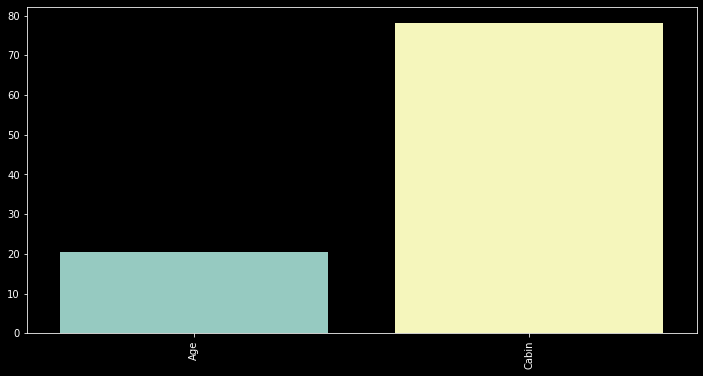

In [90]:
nan_percent= missing_percent(df_test)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [91]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Survived         0
dtype: int64

(array([0]), [Text(0, 0, 'Cabin')])

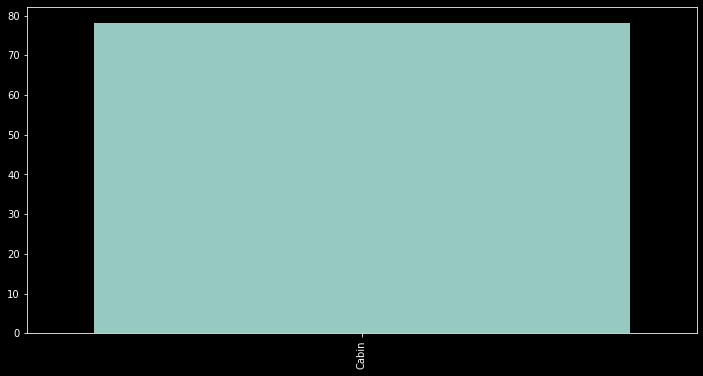

In [92]:
nan_percent= missing_percent(df_test)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [93]:
df_test=df_test.drop(['Cabin'], axis=1)

In [94]:
nan_percent= missing_percent(df_test)
nan_percent

Series([], dtype: float64)

In [95]:
df_train.drop(['Name','Ticket'], axis = 1, inplace=True)
df_test.drop(['Name','Ticket'], axis = 1, inplace=True)

In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [97]:
df_train.shape

(889, 9)

In [98]:
df_train['Survived'] = df_train['Survived'].apply(str)

In [99]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    object 
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [100]:
df_train['Pclass'] = df_train['Pclass'].apply(str)

In [101]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    object 
 2   Pclass       889 non-null    object 
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 69.5+ KB


In [102]:
df_train_num = df_train.select_dtypes(exclude='object')
df_train_obj = df_train.select_dtypes(include='object')

In [103]:
df_train_obj.drop('Survived', axis = 1, inplace=True)

C:\Users\rahul\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [104]:
df_train_obj = pd.get_dummies(df_train_obj, drop_first=True)

In [105]:
Final_train_df = pd.concat([df_train_num, df_train_obj,df_train['Survived']], axis=1)

Final_train_df

,PassengerId,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Survived
0,1,22.0,1,0,7.2500,0,1,1,0,1,0
1,2,38.0,1,0,71.2833,0,0,0,0,0,1
2,3,26.0,0,0,7.9250,0,1,0,0,1,1
3,4,35.0,1,0,53.1000,0,0,0,0,1,1
4,5,35.0,0,0,8.0500,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,27.0,0,0,13.0000,1,0,1,0,1,0
887,888,19.0,0,0,30.0000,0,0,0,0,1,1
888,889,28.0,1,2,23.4500,0,1,0,0,1,0
889,890,26.0,0,0,30.0000,0,0,1,0,0,1


In [106]:
Final_train_df.shape

(889, 11)

In [107]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
 8   Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 32.7+ KB


In [108]:
df_test.shape

(418, 9)

In [109]:
df_test['Survived'] = df_test['Survived'].apply(str)

In [110]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
 8   Survived     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 32.7+ KB


In [111]:
df_test['Pclass'] = df_test['Pclass'].apply(str)

In [116]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    object 
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
 8   Survived     418 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 32.7+ KB


In [117]:
df_test_num = df_test.select_dtypes(exclude='object')
df_test_obj = df_test.select_dtypes(include='object')

In [118]:
df_test_obj.drop('Survived', axis = 1, inplace=True)

In [119]:
df_test_obj = pd.get_dummies(df_test_obj, drop_first=True)

In [120]:
Final_test_df = pd.concat([df_test_num, df_test_obj,df_test['Survived']], axis=1)

In [121]:
X_train=Final_train_df.drop('Survived', axis = 1)
y_train=Final_train_df['Survived']

X_test=Final_test_df.drop('Survived', axis = 1)
y_test = Final_test_df['Survived']

In [122]:
X_train.shape

(889, 10)

In [164]:
X_test.shape

(418, 10)

In [124]:
scaler= StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [125]:
Logistic_model = LogisticRegression(max_iter=4000)

Logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=4000)

In [126]:
y_pred = Logistic_model.predict(X_test)

In [127]:
accuracy_score(y_test, y_pred)

0.9497607655502392

In [134]:
logModel = LogisticRegression()

In [144]:
param_grid = [    
    {'penalty' : ['l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [145]:
from sklearn.model_selection import GridSearchCV

In [146]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [147]:
X

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [148]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [151]:
 logModel = LogisticRegression()

In [156]:
 param_grid = [    
    {'penalty' : ['l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [157]:
from sklearn.model_selection import GridSearchCV

In [167]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [168]:
best_clf = clf.fit(X_test,y_test)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1152 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 2072 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 3472 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:   50.3s finished
C:\Users\rahul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [169]:
 best_clf.best_estimator_

LogisticRegression(C=0.0001, penalty='none', solver='newton-cg')

In [180]:
s = (f'Accuracy - : {best_clf.score(X_test,y_test):.3f}')
print(s)

Accuracy - : 1.000
